In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation between metagenomics and EASi-seq

#### Reference: 
```
wget https://s3.amazonaws.com/zymo-files/BioPool/ZymoBIOMICS.STD.refseq.v2.zip
```

combine all the files as one fasta file for reference 
```
cat *.fasta > zymo_all.fa
ls *.fasta | parallel "grep '>' {} | sed 's/>//g' | cut -f 1 -d ' ' > {.}.txt" ls *.txt > all_zymo_contig.list
```

#### build bowtie2 index
```
bowtie2-build --threads 4 Genomes/zymo_all.fa bz2/zymo
```
#### Metagenomic reads download and align to reference

```
https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR23559307&display=download
bowtie2 -U SRR23559307.fastq.gz -x ../ref/ZymoBIOMICS.STD.refseq.v2/bz2/zymo -p 4 | samtools view -@ 4 -Sb -q 1 -o meta_aligned.bam
samtools view meta_aligned.bam -b -q 2 -@ 4 | samtools sort -@ 4 | samtools  coverage -> meta.cov
```

bowtie2 -x ../ref/ZymoBIOMICS.STD.refseq.v2/bz2/zymo -1 SRR12324251_1.fastq.gz -2 SRR12324251_2.fastq.gz -p 4 | samtools view -@ 4 -Sb -q 1 -o SRR12324251_aligned.bam
```
29386307 reads; of these:
  29386307 (100.00%) were paired; of these:
    7974256 (27.14%) aligned concordantly 0 times
    20402395 (69.43%) aligned concordantly exactly 1 time
    1009656 (3.44%) aligned concordantly >1 times
    ----
    7974256 pairs aligned concordantly 0 times; of these:
      6854341 (85.96%) aligned discordantly 1 time
    ----
    1119915 pairs aligned 0 times concordantly or discordantly; of these:
      2239830 mates make up the pairs; of these:
        417934 (18.66%) aligned 0 times
        857043 (38.26%) aligned exactly 1 time
        964853 (43.08%) aligned >1 times
99.29% overall alignment rate

```

bowtie2 -x ../ref/ZymoBIOMICS.STD.refseq.v2/bz2/zymo -1 SRR12324252_1.fastq.gz -2 SRR12324252_2.fastq.gz -p 4 | samtools view -@ 4 -Sb -q 1 -o SRR12324252_aligned.bam
```
35951499 reads; of these:
  35951499 (100.00%) were paired; of these:
    7524314 (20.93%) aligned concordantly 0 times
    27009489 (75.13%) aligned concordantly exactly 1 time
    1417696 (3.94%) aligned concordantly >1 times
    ----
    7524314 pairs aligned concordantly 0 times; of these:
      6624961 (88.05%) aligned discordantly 1 time
    ----
    899353 pairs aligned 0 times concordantly or discordantly; of these:
      1798706 mates make up the pairs; of these:
        240792 (13.39%) aligned 0 times
        600545 (33.39%) aligned exactly 1 time
        957369 (53.23%) aligned >1 times
99.67% overall alignment rate
```
#### coverage calculation with samtools

samtools view SRR12324251_aligned.bam -b -q 2 -@ 4 | samtools sort -@ 4 | samtools  coverage -> SRR12324251_aligned.cov

samtools view SRR12324252_aligned.bam -b -q 2 -@ 4 | samtools sort -@ 4 | samtools  coverage -> SRR12324252_aligned.cov


In [ ]:
# load data
wk_dir = '/home/xiangpeng/projects/easi-seq-revision/zymo/'
zymo_data = wk_dir + 'S4_zymo_reference_genome_based_analysis.csv'
cov_data1 = wk_dir + 'SRR12324251_aligned.cov'
cov_data2 = wk_dir + 'SRR12324252_aligned.cov'

zymo = pd.read_csv(zymo_data, index_col=0)
cov1 = pd.read_csv(cov_data2, index_col=0, sep='\t')
cov2 = pd.read_csv(cov_data2, index_col=0, sep='\t')

In [5]:
# Calcualte the read counts from combined EASi-seq barcodes.
zymo['species'] = zymo['Species'].apply(lambda x: x.split('_')[0]) # the format of the data is like: 'Listeria_monocytogenes', 'Bacillus_subtilis',... need to change to 'Listeria', 'Bacillus'... 
zymo = zymo.drop(columns =['Species']) # remove the original column
zymo.head()

,TotalMappedReads,mapped_to_majority_species,Purity,readCount@Enterococcus_faecalis,readCount@Lactobacillus_fermentum,readCount@Staphylococcus_aureus,readCount@Bacillus_subtilis,readCount@Cryptococcus_neoformans,readCount@Escherichia_coli,readCount@Listeria_monocytogenes,...,meanDepth@Lactobacillus_fermentum,meanDepth@Staphylococcus_aureus,meanDepth@Bacillus_subtilis,meanDepth@Cryptococcus_neoformans,meanDepth@Escherichia_coli,meanDepth@Listeria_monocytogenes,meanDepth@Pseudomonas_aeruginosa,meanDepth@Saccharomyces_cerevisiae,meanDepth@Salmonella_enterica,species
bar,,,,,,,,,,,,,,,,,,,,,
AACAACCTAACGTCTATG-2,11366,11180,0.983635,32,11,37,1,45,11180,23,...,0.000042,0.001224,0.000017,0.002225,0.352161,0.000167,0.000079,0.001098,0.000000,Listeria
AACAACCTACTCCAGCGT-2,3206,3192,0.995633,3192,2,2,4,2,4,0,...,0.000010,0.000066,0.000198,0.000015,0.000138,0.000000,0.000000,0.000000,0.000000,Bacillus
AACAACTGGTAGTGATCC-2,47508,47036,0.990065,134,23,47036,4,119,25,2,...,0.000097,1.571000,0.000078,0.005945,0.000794,0.000028,0.000444,0.000199,0.003319,Enterococcus
AACAATGCAACTGTAATC-2,3273,3171,0.968836,27,5,23,3171,6,14,27,...,0.000020,0.000763,0.157360,0.000190,0.000104,0.000935,0.000000,0.000000,0.000000,Lactobacillus
AACAATGCACTTCCGTGG-2,93372,93003,0.996048,110,12,83,1,93,16,50,...,0.000049,0.002749,0.000017,0.004616,0.000508,0.000370,0.000079,3.193210,0.000000,Staphylococcus


In [6]:
# there are two set of data for metagenomics, they need to be combined. 
cov = pd.DataFrame(index = cov1.index) 
cov['numreads']=cov1['numreads']+cov2['numreads'] # sum the reads
cov.head()

,numreads
#rname,
BS.pilon.polished.v3.ST170922,3945560
34076,5308
35312,5230
34941,4916
34323,4328


In [15]:
# there are various contigs in the reference genome of those species. 
# so in the bowtie2 output file, there are various different lines are associated with different species. 
# need to combine the read counts that aligned to individual contigs. 
ref_dir = '/home/xiangpeng/projects/easi-seq-revision/zymo/ref/ZymoBIOMICS.STD.refseq.v2/Genomes/'
contig_ls_file = ref_dir + 'all_zymo_contig.list'

In [8]:
# extract the species contig information to make a dictionary: contig_species_dict

contig_ls = pd.read_csv(contig_ls_file, names=['file'])['file'].to_list()
contig_species_dict = {}
species = []
for f in contig_ls:
    specie = f.split('_')[0]
    
    contigs = pd.read_csv(ref_dir + f, names=['contigs'])['contigs'].tolist()
    species.append(specie)
    for c in contigs:
        contig_species_dict[str(c)]=specie
        


In [9]:
# use contig_species_dict to annotate each contig
cov['species']=cov.index.map(contig_species_dict )

In [16]:
# sum the read counts from each species. 
species_readcnt = cov.groupby('species')[['numreads']].sum()
species_readcnt

,numreads
species,
Bacillus,3945560
Cryptococcus,469652
Enterococcus,11658530
Escherichia,32833136
Lactobacillus,16952026
Listeria,2136360
Pseudomonas,31099382
Saccharomyces,860586
Salmonella,33718274


In [20]:
# combine the read counts for each species from metagenomis and EASi-seq, as well as the barcode counts into one pd dataframe
zymo_read_cnt = zymo.groupby('species')[['mapped_to_majority_species']].sum()
zymo_read_cnt['bar_cnt']=zymo.species.value_counts()
zymo_read_cnt['meta_read_cnt']=species_readcnt['numreads']
zymo_read_cnt

,mapped_to_majority_species,bar_cnt,meta_read_cnt
species,,,
Bacillus,48788372,632,3945560
Cryptococcus,19915325,202,469652
Enterococcus,50502664,741,11658530
Escherichia,788809,46,32833136
Lactobacillus,62834338,1246,16952026
Listeria,8820340,162,2136360
Pseudomonas,142191,21,31099382
Saccharomyces,17337864,347,860586
Salmonella,983823,86,33718274


In [21]:
# define the color of each species. 
genus = ['Enterococcus' , 
         'Lactobacillus', 
         'Staphylococcus', 
         'Bacillus', 
         'Cryptococcus',
         'Escherichia',
         'Listeria',
         'Pseudomonas',
         'Saccharomyces', 
         'Salmonella',
         #'other',
         #'Mixed'
        ]

colors = ['#a6cee3',
         '#1f78b4',
         '#b2df8a',
         '#33a02c',
         '#fb9a99',
         '#e31a1c',
         '#fdbf6f',
         '#ff7f00',
         '#cab2d6',
         '#6a3d9a',
         #'#ffff99',
         #'tab:grey',
         #6a3d9a
#ffff99
#b15928
         ] 

genus_color_table = dict(zip(genus,colors))      
genus_color_table.keys()

dict_keys(['Enterococcus', 'Lactobacillus', 'Staphylococcus', 'Bacillus', 'Cryptococcus', 'Escherichia', 'Listeria', 'Pseudomonas', 'Saccharomyces', 'Salmonella'])

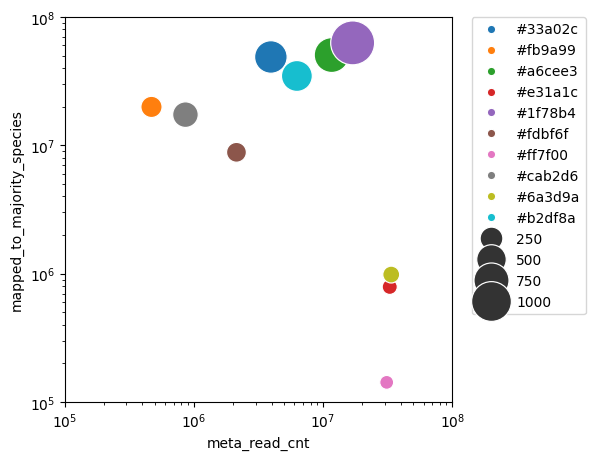

In [24]:
# scatter plot
plt.figure(figsize=(5, 5))

# Scatter plot
sns.scatterplot(
    x='meta_read_cnt',
    y='mapped_to_majority_species',
    size='bar_cnt',
    data=zymo_read_cnt,
    sizes=(100, 1000),
    hue=genus_color_table
)

# Set plot scales and limits
plt.xscale('log')
plt.yscale('log')
plt.xlim([100000, 100000000])
plt.ylim([100000, 100000000])

# Legend positioning
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.savefig(wk_dir + 'zymo_easi-seq_vs_meta_scatter_plot_no_reg.pdf', format='pdf', bbox_inches='tight')

plt.show()



In [25]:
# clearly the gram negative species are less repersented in the data. 
# define the non_gram_neg species for correlation study
non_gram_neg = ['Enterococcus', 
                'Lactobacillus', 
                'Staphylococcus', 
                'Bacillus', 
                'Cryptococcus', 
                'Listeria', 
                'Saccharomyces', ]

In [26]:
# Calcualte the correlation between the read counts from non-gram-neg species of metagenomics and that of easi-seq
non_gram_neg_df = zymo_read_cnt.loc[non_gram_neg]
correlation = non_gram_neg_df['meta_read_cnt'].corr(non_gram_neg_df['mapped_to_majority_species'], method='spearman')
print(correlation)

0.8214285714285715


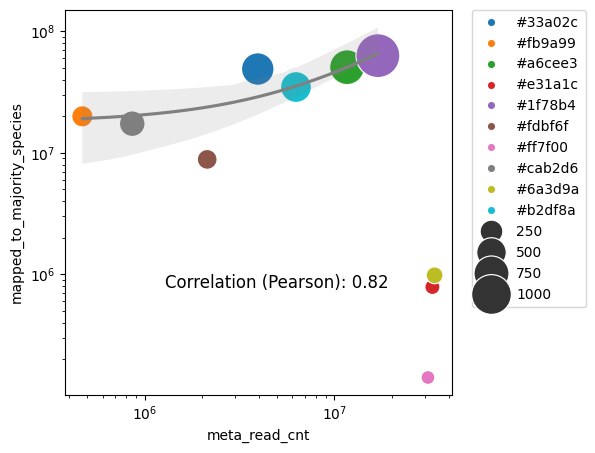

In [28]:
# plot with regression 

plt.figure(figsize=(5, 5))

# Scatter plot
sns.scatterplot(
    x='meta_read_cnt',
    y='mapped_to_majority_species',
    size='bar_cnt',
    data=zymo_read_cnt,
    sizes=(100, 1000),
    hue=genus_color_table
)

# Regression line with gray color for line and shade
sns.regplot(
    x='meta_read_cnt',
    y='mapped_to_majority_species',
    scatter=False,  # No scatter points
    data=zymo_read_cnt.loc[non_gram_neg],
    line_kws={'color': 'gray'},  # Set the regression line color to gray
    scatter_kws={'color': 'gray'},  # Set the scatter point color (if any) to gray
    #ci=None  # Remove the confidence interval (shade), if you only want the line
)

# Set plot scales and limits
plt.xscale('log')
plt.yscale('log')
#plt.xlim([100000, 100000000])
#plt.ylim([100000, 100000000])

plt.text(
    x=5000000,  # Adjust this value to place the text correctly on the x-axis
    y=1000000,  # Adjust this value to place the text correctly on the y-axis
    s=f"Correlation (Pearson): {correlation:.2f}",  # Format the correlation to 2 decimal places
    ha='center',  # Horizontal alignment (centered)
    va='top',  # Vertical alignment (top)
    fontsize=12,
    color='black'
)


# Legend positioning
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.savefig(wk_dir + 'zymo_easi-seq_vs_meta_scatter_plot.pdf', format='pdf', bbox_inches='tight')

plt.show()

